In [15]:
from pycbc.detector import Detector, load_detector_config
import numpy

from matplotlib import pyplot as plt

import geopy
from geopy.distance import geodesic

# Load the CE detector configuration
load_detector_config('./detectors.ini')

ifos = ['CE_A', 'CE_B',  'E1', 'E2', 'E3', 'H1', 'L1', 'V1', 'I1', 'K1']

lats = []
lons = []
names = []
colors = []
for ifo in ifos:
    d = Detector(ifo)

    vertex = geopy.Point(numpy.rad2deg(d.latitude), numpy.rad2deg(d.longitude))
    endx = geodesic(meters=d.info['xlength']).destination(vertex, numpy.rad2deg(d.info['xangle']))
    endy = geodesic(meters=d.info['ylength']).destination(vertex, numpy.rad2deg(d.info['yangle']))

    for pos in [endx, vertex, endy]:
        lats.append(pos.latitude)
        lons.append(pos.longitude)

    lats.append(None)
    lons.append(None)

    color_group = "Current Generation Observatories"
    if  ifo in ['CE_A', 'CE_B']:
        color_group = "Cosmic Explorer (Fiducial, not planned location)"
    elif ifo in ["E1", "E2", "E3"]:
        color_group = "Einstein Telescope (Fiducial, not planned location)"
    
    colors += [color_group] * 4
    names += [ifo] * 4

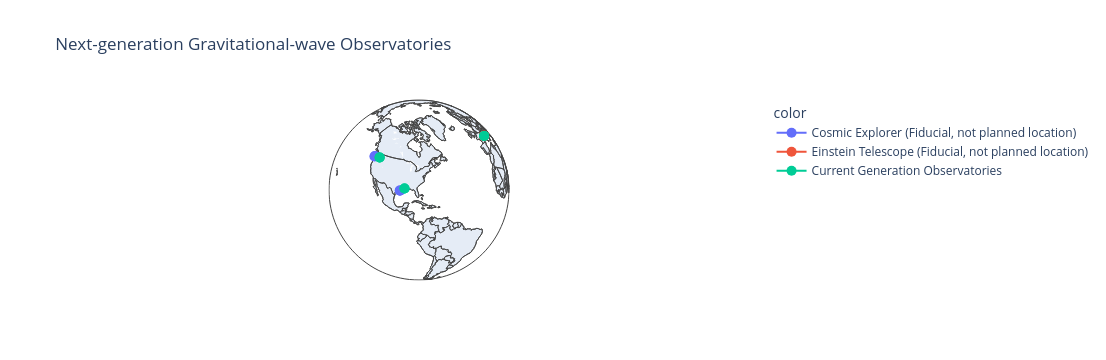

In [16]:
import plotly.express as px


fig = px.line_geo(lat=lats, lon=lons,
                  color=colors,
                  #text=names,
                  projection="orthographic",
                  markers=True,
                  hover_name=names,
                  title='Next-generation Gravitational-wave Observatories',
                  #center={'lat': 30,'lon': 118},
                 )
fig.update_traces(marker=dict(size=10))
fig.update_geos(projection_rotation_lat=30, projection_rotation_lon=-80)
fig.update_geos(showcountries=True)
fig.show()
fig.write_html('gravitational_wave_observatories.html')

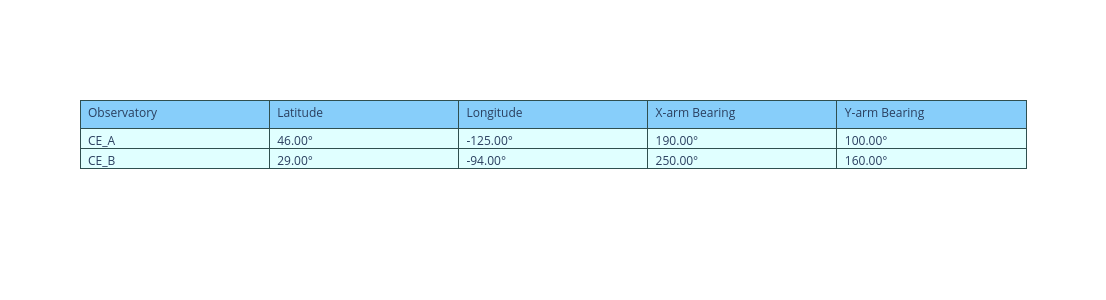

In [17]:
import plotly.graph_objects as go

names = []
lats = []
lons = []
xangle = []
yangle = []

def style(angle):
    return "{0:.2f}°".format(180 / numpy.pi * angle)

for ifo in ['CE_A', 'CE_B']:
    d = Detector(ifo)
    names.append(ifo)
    lats.append(style(d.latitude))
    lons.append(style(d.longitude))
    xangle.append(style(d.info['xangle']))
    yangle.append(style(d.info['yangle']))

fig = go.Figure(data=[go.Table(
    header=dict(values=['Observatory', 'Latitude', 'Longitude', 'X-arm Bearing', 'Y-arm Bearing'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[names, lats, lons, xangle, yangle], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=800, height=300)
fig.write_html('detector_location.html')
fig.show()